### Loading the dataset from google drive by specifying the path of the dataset

In [ ]:
cd /content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset

/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset


### Image augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data",target_size=(64,64),
                                        class_mode = "categorical",batch_size = 24 )

Found 138 images belonging to 6 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Testing data",target_size=(64,64),
                                        class_mode = "categorical",batch_size = 24 )

Found 118 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flower': 2,
 'Pangolin Mammal': 3,
 'Senenca White Deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

### Buiding the CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
# intialize 
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1, 1),input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(6,activation = "softmax"))

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
len(x_train)

6

In [ ]:
model.fit(x_train, epochs = 20,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/20
6/6 [==============================] - 4s 551ms/step - loss: 2.4207 - accuracy: 0.2246 - val_loss: 1.8146 - val_accuracy: 0.1949
Epoch 2/20
6/6 [==============================] - 3s 456ms/step - loss: 1.8859 - accuracy: 0.2899 - val_loss: 1.4406 - val_accuracy: 0.4661
Epoch 3/20
6/6 [==============================] - 3s 449ms/step - loss: 1.4752 - accuracy: 0.4493 - val_loss: 1.5805 - val_accuracy: 0.3729
Epoch 4/20
6/6 [==============================] - 3s 440ms/step - loss: 1.3247 - accuracy: 0.4783 - val_loss: 1.3778 - val_accuracy: 0.4492
Epoch 5/20
6/6 [==============================] - 3s 444ms/step - loss: 1.2004 - accuracy: 0.5000 - val_loss: 1.4320 - val_accuracy: 0.4576
Epoch 6/20
6/6 [==============================] - 3s 448ms/step - loss: 1.1019 - accuracy: 0.6087 - val_loss: 1.5233 - val_accuracy: 0.4576
Epoch 7/20
6/6 [==============================] - 2s 437ms/step - loss: 0.9701 - accuracy: 0.5797 - val_loss: 1.3572 - val_accuracy: 0.5763
Epoch 8/20
6/6 [====

In [ ]:
model.save('final_model.h5')

### Testing the CNN model for all the 6 species

### for senenca white deer (mammal)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('final_model.h5')

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Senenca White Deer Mammal/download (2).jpg")

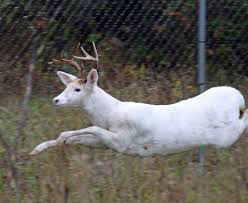

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Senenca White Deer Mammal/download (2).jpg", target_size=(64,64))

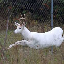

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[ 43.,  52.,  31.],
        [ 82.,  90.,  75.],
        [ 67.,  74.,  66.],
        ...,
        [ 56.,  69.,  60.],
        [ 34.,  46.,  36.],
        [ 51.,  65.,  52.]],

       [[ 70.,  77.,  61.],
        [ 76.,  82.,  70.],
        [ 47.,  52.,  45.],
        ...,
        [ 15.,  26.,  18.],
        [ 46.,  57.,  49.],
        [ 73.,  86.,  76.]],

       [[ 83.,  86.,  75.],
        [ 39.,  42.,  33.],
        [ 64.,  66.,  61.],
        ...,
        [ 31.,  40.,  35.],
        [ 53.,  62.,  57.],
        [ 33.,  44.,  36.]],

       ...,

       [[101.,  95.,  73.],
        [112.,  99.,  80.],
        [111.,  98.,  81.],
        ...,
        [ 96.,  85.,  67.],
        [114., 109.,  79.],
        [ 99.,  94.,  64.]],

       [[107.,  95.,  83.],
        [107.,  89.,  79.],
        [113., 100.,  83.],
        ...,
        [ 95.,  82.,  66.],
        [121., 114.,  85.],
        [101.,  94.,  65.]],

       [[112.,  93.,  86.],
        [103.,  82.,  79.],
        [104.,  

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 131ms/step


In [ ]:
pred

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Seneca white deer Mammal'

##test for pangolin mammal (mammal)

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Pangolin Mammal/images (11).jpg")

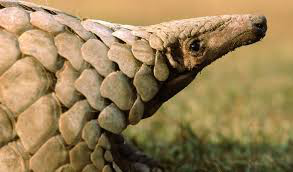

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Pangolin Mammal/images (11).jpg", target_size=(64,64))

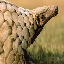

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[207., 171., 149.],
        [222., 191., 173.],
        [224., 200., 188.],
        ...,
        [219., 170., 112.],
        [217., 168., 110.],
        [218., 169., 111.]],

       [[186., 158., 118.],
        [169., 141., 104.],
        [153., 126.,  96.],
        ...,
        [217., 168., 110.],
        [215., 166., 108.],
        [216., 167., 109.]],

       [[ 43.,  18.,   0.],
        [165., 137., 100.],
        [153., 122.,  91.],
        ...,
        [215., 166., 108.],
        [213., 164., 106.],
        [212., 166., 107.]],

       ...,

       [[227., 187., 138.],
        [204., 164., 113.],
        [180., 140.,  88.],
        ...,
        [ 56.,  57.,  25.],
        [ 78.,  81.,  50.],
        [ 59.,  57.,  34.]],

       [[233., 192., 146.],
        [219., 179., 130.],
        [203., 163., 111.],
        ...,
        [ 50.,  54.,  21.],
        [ 64.,  67.,  36.],
        [ 64.,  62.,  41.]],

       [[227., 186., 142.],
        [221., 180., 134.],
        [211., 1

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 31ms/step


In [ ]:
pred

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Pangolin Mammal'

## test for corpse flower (flower)

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Corpse Flower/download.jpg")

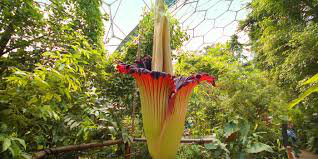

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Corpse Flower/download.jpg", target_size=(64,64))

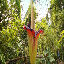

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[ 55.,  62.,  10.],
        [ 98., 120.,  38.],
        [139., 150., 110.],
        ...,
        [ 44.,  45.,   5.],
        [ 51.,  60.,  31.],
        [ 84.,  98.,  36.]],

       [[ 30.,  36.,   0.],
        [ 54.,  75.,   0.],
        [ 57.,  66.,  21.],
        ...,
        [ 78.,  75.,  42.],
        [ 64.,  73.,  46.],
        [ 71.,  84.,  30.]],

       [[ 34.,  41.,   0.],
        [ 55.,  69.,  16.],
        [ 96., 102.,  56.],
        ...,
        [130., 125., 103.],
        [ 54.,  60.,  32.],
        [ 44.,  52.,  15.]],

       ...,

       [[ 24.,  29.,   0.],
        [ 32.,  39.,   8.],
        [134., 151.,  83.],
        ...,
        [123.,  99.,  63.],
        [ 89.,  75.,  38.],
        [ 46.,  44.,  21.]],

       [[ 20.,  23.,   4.],
        [ 36.,  42.,  16.],
        [ 61.,  75.,  26.],
        ...,
        [132., 105.,  76.],
        [122., 102.,  67.],
        [ 93.,  79.,  53.]],

       [[ 25.,  27.,  14.],
        [ 52.,  59.,  26.],
        [ 43.,  

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 33ms/step


In [ ]:
pred

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Corpse Flower'

## testing for great indian bustard (bird)

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Great Indian Bustard Bird/images (5).jpg")

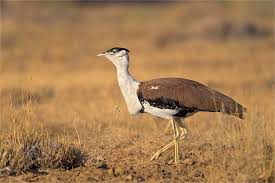

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Great Indian Bustard Bird/images (5).jpg",target_size=(64,64))

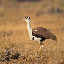

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[110.,  87.,  69.],
        [134., 108.,  83.],
        [144., 114.,  80.],
        ...,
        [135., 117.,  81.],
        [135., 117.,  81.],
        [136., 119.,  89.]],

       [[114.,  92.,  71.],
        [131., 105.,  80.],
        [142., 111.,  80.],
        ...,
        [137., 117.,  82.],
        [137., 117.,  82.],
        [135., 119.,  86.]],

       [[115.,  93.,  72.],
        [128., 102.,  77.],
        [139., 108.,  80.],
        ...,
        [139., 116.,  82.],
        [139., 116.,  82.],
        [136., 117.,  84.]],

       ...,

       [[138., 120.,  98.],
        [137., 111.,  84.],
        [ 80.,  58.,  37.],
        ...,
        [181., 131.,  82.],
        [177., 136.,  82.],
        [129.,  99.,  61.]],

       [[172., 132.,  96.],
        [131.,  92.,  53.],
        [159., 120.,  79.],
        ...,
        [162., 122.,  71.],
        [ 94.,  62.,  15.],
        [ 95.,  65.,  27.]],

       [[152., 113.,  72.],
        [157., 118.,  75.],
        [169., 1

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 31ms/step


In [ ]:
pred

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Great Indian Bustard Bird'

## test for Lady slipper orchid (flower)

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Lady Slipper Orchid Flower/download (8).jpg")

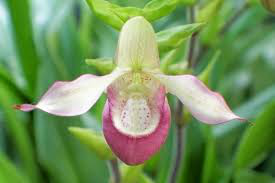

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Lady Slipper Orchid Flower/download (8).jpg",target_size=(64,64))

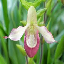

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[128., 181., 175.],
        [ 69., 144.,  85.],
        [ 44., 123.,  14.],
        ...,
        [106., 103.,  48.],
        [106.,  93.,  41.],
        [120., 111.,  56.]],

       [[155., 201., 198.],
        [ 89., 159., 109.],
        [ 49., 127.,  26.],
        ...,
        [ 94., 105.,  45.],
        [ 95.,  88.,  33.],
        [118., 114.,  51.]],

       [[186., 222., 222.],
        [112., 173., 140.],
        [ 54., 128.,  43.],
        ...,
        [ 79., 110.,  43.],
        [ 82.,  87.,  29.],
        [106., 111.,  45.]],

       ...,

       [[ 96., 169.,  36.],
        [ 90., 160.,  35.],
        [ 92., 157.,  37.],
        ...,
        [ 52.,  92.,  39.],
        [ 52.,  89.,  48.],
        [ 31.,  61.,  33.]],

       [[ 99., 176.,  38.],
        [ 91., 164.,  31.],
        [ 92., 161.,  36.],
        ...,
        [ 60., 104.,  27.],
        [ 60., 102.,  36.],
        [ 56.,  93.,  50.]],

       [[103., 180.,  42.],
        [ 95., 168.,  35.],
        [ 92., 1

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 28ms/step


In [ ]:
pred

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Lady Slipper Orchid Flowers'

## test for spoon billed sandpiper (bird)

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Spoon Billed Sandpiper Bird/images (11).jpg")

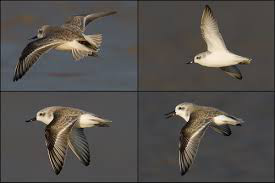

In [ ]:
img

In [ ]:
img = image.load_img(r"/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/Training data/Spoon Billed Sandpiper Bird/images (11).jpg", target_size=(64,64))

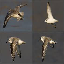

In [ ]:
img

In [ ]:
x = image.img_to_array(img)


In [ ]:
x

array([[[85., 83., 84.],
        [83., 81., 82.],
        [83., 81., 82.],
        ...,
        [78., 73., 70.],
        [78., 73., 70.],
        [74., 73., 71.]],

       [[83., 81., 82.],
        [82., 80., 81.],
        [82., 80., 81.],
        ...,
        [80., 75., 72.],
        [80., 75., 72.],
        [74., 73., 71.]],

       [[80., 78., 79.],
        [78., 76., 77.],
        [80., 78., 79.],
        ...,
        [77., 72., 69.],
        [77., 72., 69.],
        [73., 72., 70.]],

       ...,

       [[75., 75., 77.],
        [81., 81., 83.],
        [79., 79., 81.],
        ...,
        [69., 69., 69.],
        [68., 68., 68.],
        [69., 69., 69.]],

       [[86., 86., 86.],
        [83., 83., 83.],
        [77., 77., 77.],
        ...,
        [68., 68., 68.],
        [68., 68., 68.],
        [68., 68., 68.]],

       [[81., 81., 81.],
        [80., 80., 80.],
        [81., 81., 81.],
        ...,
        [71., 71., 71.],
        [71., 71., 71.],
        [65., 65., 65.]]

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 36ms/step


In [ ]:
pred

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
x_test.class_indices


{'Corpse Flower': 0,
 'Great Indian Bustard Bird': 1,
 'Lady Slipper Orchid Flowers': 2,
 'Pangolin Mammal': 3,
 'Seneca white deer Mammal': 4,
 'Spoon Billed Sandpiper Bird': 5}

In [ ]:
index = ['Corpse Flower','Great Indian Bustard Bird','Lady Slipper Orchid Flowers','Pangolin Mammal','Seneca white deer Mammal','Spoon Billed Sandpiper Bird']

In [ ]:
index[np.argmax(pred)]

'Spoon Billed Sandpiper Bird'

# Cloud deployment

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('final_model.h5')

In [ ]:
!tar -zcvf cnn-model.tgz final_model.h5

final_model.h5
tar: final_model.h5: file changed as we read it


In [ ]:
#connecting the model with IBM cloud

In [ ]:
! pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"8F4IN2zItUvJGSUK4wUSjq6gWJ3Qpxn2wvn2O9GK8flx"
}

In [ ]:
client = APIClient (wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
b34ee3a2-0c16-4d9a-9f4c-569c485fac35  nalaiya-thiran  2022-11-18T15:16:45.756Z
------------------------------------  --------------  ------------------------


In [ ]:
space_uid = "b34ee3a2-0c16-4d9a-9f4c-569c485fac35"

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
 client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [ ]:
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model = 'cnn-model.tgz', meta_props={ 
    client.repository.ModelMetaNames.NAME: "CNN model",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid})

In [ ]:
model_id = client.repository.get_model_id(model_details)

In [ ]:
model_id

'c16bc6ba-386f-423c-ad45-f8a5f13f851d'

In [ ]:
client.repository.download(model_id, 'final_model.tar.gb')

Successfully saved model content to file: 'final_model.tar.gb'


'/content/drive/MyDrive/finalsubmission/Digital Naturalist Dataset/final_model.tar.gb'